# Setup

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get a sample for quick analysis
data = pd.read_csv('/kaggle/input/sales-data-for-a-chain-of-brazilian-stores/Sales Report.csv', sep=';', parse_dates=['Sale Date Time'])
data = data.sample(5000)

In [3]:
# optional: convert string types to category for faster analysis
#for col in data.select_dtypes('object').columns:
#    data[col] = data[col].astype('category')

# Data analysis

In [28]:
data.head()

,Company Code,Order Number,Employee,Product,Product Category,Client,Client City,Sale Date Time,Product Cost,Discount Amount,Amount,Total,Form of payment,Unit Price,Markup
24669391,3685000,2229782,Bryant Fletcher,Gasoline,Fuel,Customer not informed,No City,2020-01-19 14:45:00,3.822,0.0,24.045,100.00,Money,4.158869,108.813940
860213,882000,265809,Yvonne Walsh,Special Gasoline,Fuel,Customer not informed,No City,2017-08-14 17:26:00,3.120,0.0,5.410,20.01,Money,3.698706,118.548272
13394374,10298000,1403524,Homer Robinson,Diesel,Fuel,Customer not informed,No City,2019-01-18 16:09:00,2.766,0.0,9.840,30.00,Money,3.048780,110.223445
17718623,1757000,1720375,Fred Bradley,Special Gasoline,Fuel,Customer not informed,No City,2019-06-12 16:21:00,3.691,0.0,12.052,50.00,Money,4.148689,112.400136
19899615,3964000,1881576,Elizabeth Russell,Lubricant 402,Lubricant,Customer not informed,No City,2019-08-29 11:43:00,2.199,0.0,2.000,6.00,Money,3.000000,136.425648


In [29]:
data.describe(include='all')

,Company Code,Order Number,Employee,Product,Product Category,Client,Client City,Sale Date Time,Product Cost,Discount Amount,Amount,Total,Form of payment,Unit Price,Markup
count,5.000000e+03,5.000000e+03,5000,5000,5000,5000,5000,5000,5000.000000,5000.0,5000.000000,5000.000000,5000,5000.000000,5000.000000
unique,NaN,NaN,693,334,26,186,59,4983,NaN,NaN,NaN,NaN,7,NaN,NaN
top,NaN,NaN,Joy Pearson,Special Gasoline,Fuel,Customer not informed,No City,2019-01-18 10:29:00,NaN,NaN,NaN,NaN,Money,NaN,NaN
freq,NaN,NaN,30,2574,4376,4673,4673,2,NaN,NaN,NaN,NaN,3357,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-04 14:43:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-02 15:14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.371432e+06,1.379496e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.737585,0.0,17.249415,65.510434,NaN,4.453067,120.095588
std,4.265652e+06,6.128158e+05,NaN,NaN,NaN,NaN,NaN,NaN,2.100867,0.0,27.871099,92.678014,NaN,3.418428,42.035278
min,3.900000e+04,9.671000e+03,NaN,NaN,NaN,NaN,NaN,NaN,0.120000,0.0,0.251000,0.250000,NaN,0.250000,90.142000
25%,8.820000e+05,9.050035e+05,NaN,NaN,NaN,NaN,NaN,NaN,3.389000,0.0,4.880000,20.000000,NaN,3.788836,108.220972


Since we have product costs and total amounts, we can derive unit prices and product mark-ups:

In [89]:
# create some new columns
data['Unit Price'] = data['Total']/data['Amount']
data['Markup'] = data['Unit Price']/data['Product Cost']*100

data['Year'] = data['Sale Date Time'].dt.year
data['Month'] = data['Sale Date Time'].dt.month
data['Week'] = data['Sale Date Time'].dt.week
data['Weekday'] = data['Sale Date Time'].dt.weekday
data['Hour'] = data['Sale Date Time'].dt.hour

In [60]:
data.dtypes

Company Code                 int64
Order Number                 int64
Employee                    object
Product                     object
Product Category            object
Client                      object
Client City                 object
Sale Date Time      datetime64[ns]
Product Cost               float64
Discount Amount            float64
Amount                     float64
Total                      float64
Form of payment             object
Unit Price                 float64
Markup                     float64
Year                         int64
Month                        int64
Week                         int64
Hour                         int64
dtype: object

## Top clients and products

In [15]:
# top clients
top_clients = data.groupby('Client')['Client','Total'].sum().sort_values(by='Total', ascending=False).reset_index()
top_clients[:10]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Client,Total
0,Customer not informed,282666.93
1,Arthur Mason,2991.39
2,Barry Barrett,2946.36
3,Amy Silva,2454.17
4,Penny Burns,1777.68
5,Edith Mccarthy,1454.00
6,Faye Pittman,1151.24
7,Joann Underwood,1069.03
8,Toni Murray,965.72
9,Dewey Houston,814.23


In [24]:
data.groupby(['Product Category'])['Amount','Total'].sum().sort_values(by='Total', ascending=False)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Amount,Total
Product Category,,
Fuel,85375.073,320640.04
Lubricant,235.000,3388.21
Cigarettes,123.000,951.25
Filters,17.000,354.05
Additives And Fluids,21.000,308.50
Cold Alcoholic Beverages,63.000,224.04
Chewing Gum And Candy,84.000,208.99
Pickets,8.000,194.25
Juices And Soft Drinks,43.000,177.74


## Key metrics over time

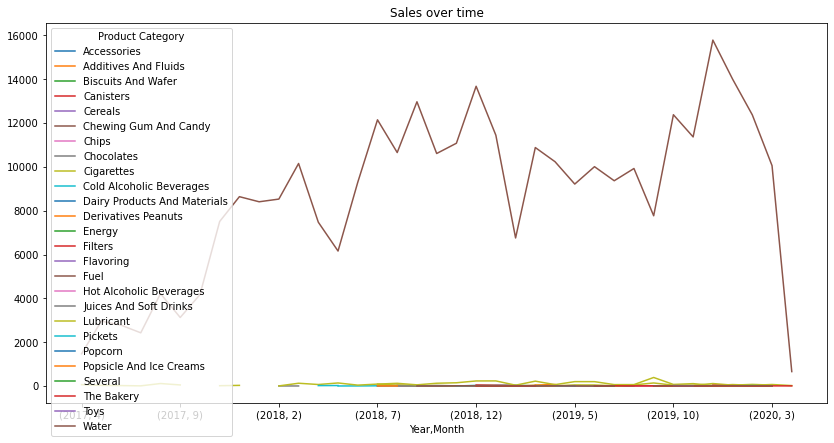

In [126]:
# sales over time
data.groupby(['Year','Month','Product Category'])['Total'].sum().unstack().plot(figsize=(14,7), title='Sales over time')

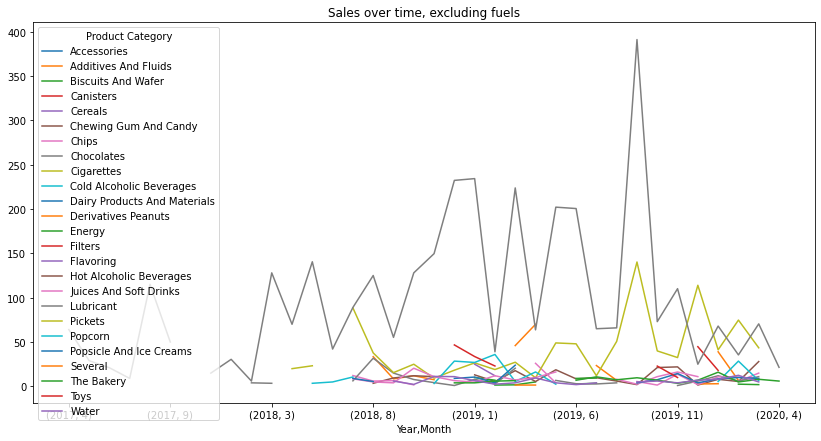

In [127]:
# sales over time excluding fuels
data.loc[data['Product Category']!='Fuel'].groupby(['Year','Month','Product Category'])['Total'].sum().unstack().plot(figsize=(14,7), title='Sales over time, excluding fuels')

(100.0, 300.0)

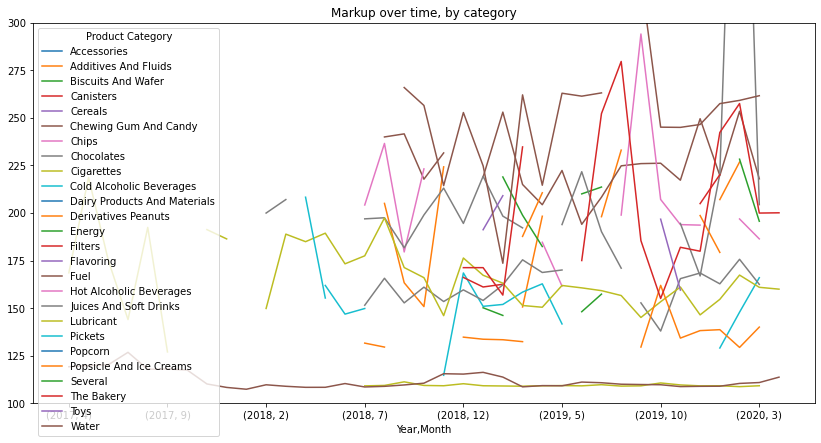

In [100]:
# markup over time
data.groupby(['Year','Month','Product Category'])['Markup'].mean().unstack().plot(figsize=(14,7), title='Markup over time, by category')
plt.ylim(100, 300) # adjust y-axis

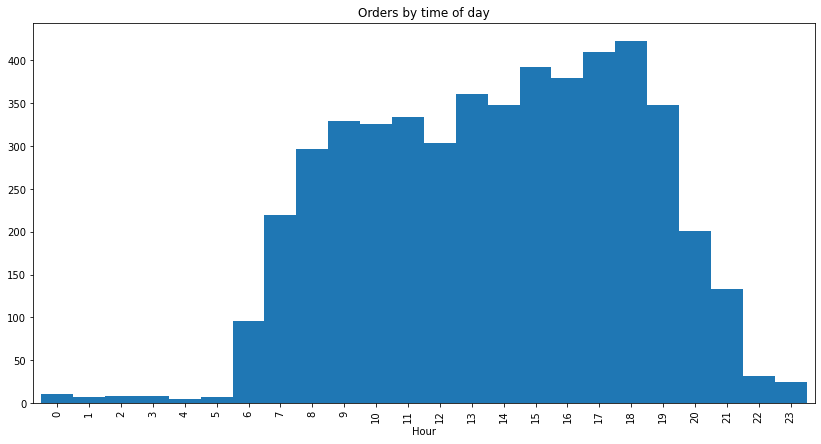

In [92]:
# orders by time of day
data.groupby('Hour')['Order Number'].count().plot(kind='bar', width=1, figsize=(14,7), title='Orders by time of day')

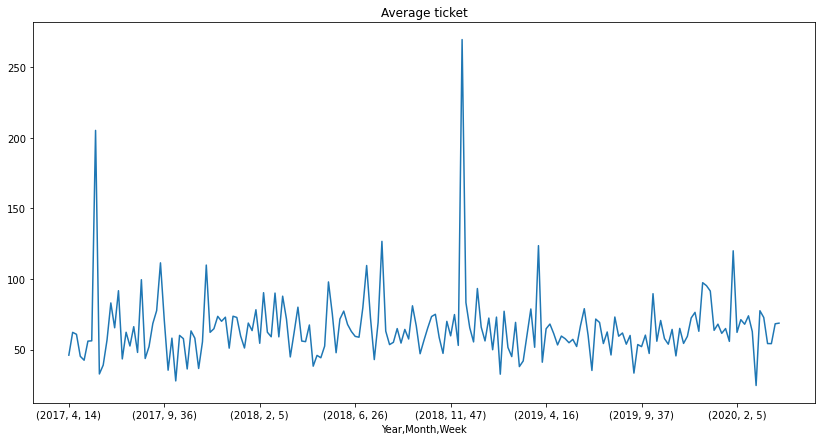

In [101]:
# average ticket
data.groupby(['Year','Month','Week'])['Total'].mean().plot(title='Average ticket', figsize=(14,7))

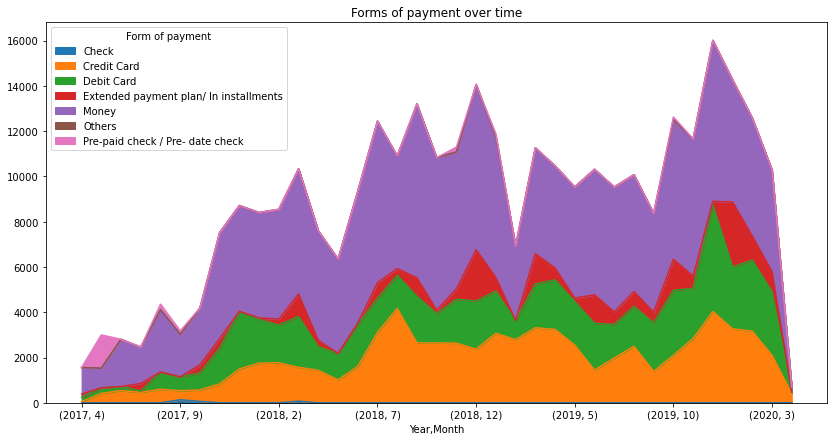

In [115]:
data.groupby(['Year','Month','Form of payment'])['Total'].sum().unstack().plot(kind='area', title='Forms of payment over time', figsize=(14,7))